In [0]:
from xml.dom.minidom import parse, Node
from smart_open import open
import numpy as np

In [0]:
words = []
anger = []
anticipation = []
disgust = []
fear = []
joy = []
negative = []
positive = []
sadness = []
surprise = []
trust = []

file_loc = "https://raw.githubusercontent.com/ogrenenmakine/Character-Emotions/master/Emotion-Lexicon.csv"
file = open(file_loc, 'r') 
lines = file.readlines() 
for line in lines[1:]:
    row = line.strip().split("\t")
    words.append(row[0])
    anger.append(row[1])
    anticipation.append(row[2])
    disgust.append(row[3])
    fear.append(row[4])
    joy.append(row[5])
    negative.append(row[6])
    positive.append(row[7])
    sadness.append(row[8])
    surprise.append(row[9])
    trust.append(row[10])

In [0]:
xmlTree = parse(open("https://www.ibiblio.org/xml/examples/shakespeare/r_and_j.xml"))
all_play = []
for node in xmlTree.getElementsByTagName("SPEECH"):
  try:
    for i in range(len(node.getElementsByTagName("LINE"))):
        line = node.getElementsByTagName("LINE")[i].firstChild.data.split()
        for word in line:
          all_play.append(word)
  except:
    continue

In [0]:
score_pn = [0]
score_fa = [0]
score_sa = [0]
score_sj = [0]
score_dt = [0]
for i in range(len(all_play)):
  if all_play[i] in words:
    pn = -int(negative[words.index(all_play[i])]) + int(positive[words.index(all_play[i])])
    fa = -int(fear[words.index(all_play[i])]) + int(anger[words.index(all_play[i])])
    sa = -int(anticipation[words.index(all_play[i])]) + int(surprise[words.index(all_play[i])])
    sj = -int(sadness[words.index(all_play[i])]) + int(joy[words.index(all_play[i])])
    dt = -int(disgust[words.index(all_play[i])]) + int(trust[words.index(all_play[i])])
  else:
    pn = 0
    fa = 0
    sa = 0
    sj = 0
    dt = 0
  score_pn.append(score_pn[-1] + pn)
  score_fa.append(score_fa[-1] + fa)
  score_sa.append(score_sa[-1] + sa)
  score_sj.append(score_sj[-1] + sj)
  score_dt.append(score_dt[-1] + dt)

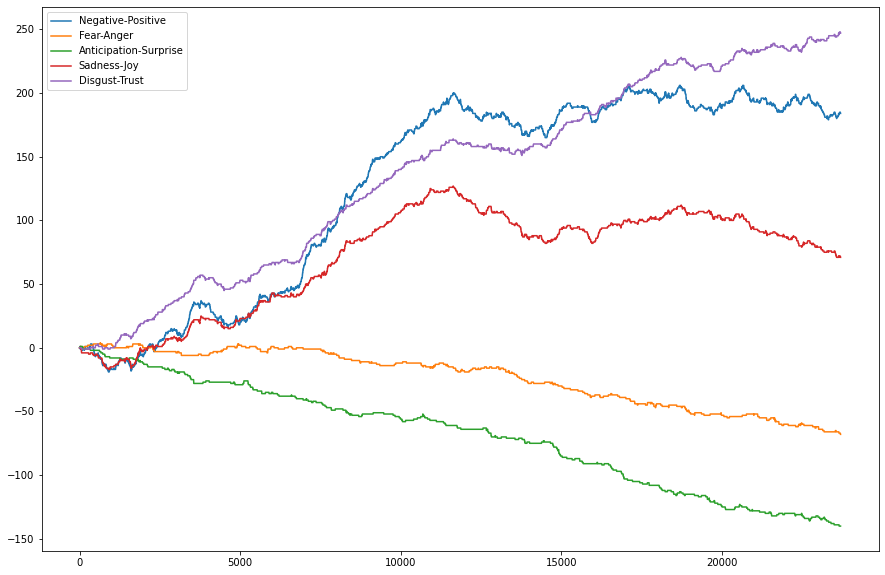

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(score_pn, label="Negative-Positive")
plt.plot(score_fa, label="Fear-Anger")
plt.plot(score_sa, label="Anticipation-Surprise")
plt.plot(score_sj, label="Sadness-Joy")
plt.plot(score_dt, label="Disgust-Trust")
plt.legend()
plt.show()